In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nba_api.stats.static import players, teams
from nba_api.stats.endpoints import playernextngames, playergamelog, playergamelogs, teamvsplayer


Matplotlib is building the font cache; this may take a moment.


In [233]:
def get_player_id(name):
    player = players.find_players_by_full_name(name)
    return player[0]['id']

def get_team_id(team):
    team = teams.find_teams_by_city(team)
    return team[0]['id']

In [234]:
id = get_player_id("James Harden")
team = get_team_id("Miami")
next = playernextngames.PlayerNextNGames(
    number_of_games="5",
    player_id=str(id),
    season_all="2023",
    season_type_all_star="Regular Season")
next_games = next.get_data_frames()[0]
next_games.head()



,GAME_ID,GAME_DATE,HOME_TEAM_ID,VISITOR_TEAM_ID,HOME_TEAM_NAME,VISITOR_TEAM_NAME,HOME_TEAM_ABBREVIATION,VISITOR_TEAM_ABBREVIATION,HOME_TEAM_NICKNAME,VISITOR_TEAM_NICKNAME,GAME_TIME,HOME_WL,VISITOR_WL
0,0022301052,"MAR 27, 2024",1610612755,1610612746,Philadelphia,LA Clippers,PHI,LAC,76ers,Clippers,07:30 PM,39-33,44-27
1,0022301064,"MAR 29, 2024",1610612753,1610612746,Orlando,LA Clippers,ORL,LAC,Magic,Clippers,07:00 PM,42-29,44-27
2,0022301079,"MAR 31, 2024",1610612766,1610612746,Charlotte,LA Clippers,CHA,LAC,Hornets,Clippers,06:00 PM,17-54,44-27
3,0022301101,"APR 02, 2024",1610612758,1610612746,Sacramento,LA Clippers,SAC,LAC,Kings,Clippers,10:00 PM,42-30,44-27
4,0022301114,"APR 04, 2024",1610612746,1610612743,LA Clippers,Denver,LAC,DEN,Clippers,Nuggets,10:00 PM,44-27,51-21


In [235]:
logs = playergamelogs.PlayerGameLogs(
    player_id_nullable=str(id),
    opp_team_id_nullable=str(team),
)
#does not work that well
logs = logs.get_data_frames()[0]
logs.head()

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3,WNBA_FANTASY_PTS,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,FGM_RANK,FGA_RANK,FG_PCT_RANK,FG3M_RANK,FG3A_RANK,FG3_PCT_RANK,FTM_RANK,FTA_RANK,FT_PCT_RANK,OREB_RANK,DREB_RANK,REB_RANK,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG
0,2016-17,201935,James Harden,James,1610612745,HOU,Houston Rockets,0021600841,2017-02-15T00:00:00,HOU vs. MIA,L,41.723333,10,21,0.476,4,10,0.400,14,16,0.875,3,9,12,12,4,0,1,0,5,8,38,-6,69.4,1,1,68.0,1,1,1,1,1,2,2,1,1,2,1,1,1,2,1,2,1,1,2,2,1,1,2,1,2,2,1,1,1,2,1
1,2016-17,201935,James Harden,James,1610612745,HOU,Houston Rockets,0021600623,2017-01-17T00:00:00,HOU @ MIA,L,39.333333,12,30,0.400,4,15,0.267,12,13,0.923,1,11,12,10,6,2,0,0,3,7,40,0,69.4,1,1,70.0,1,1,1,1,2,1,1,2,1,1,2,2,2,1,2,1,1,2,1,1,2,1,1,2,1,1,1,1,1,1,1


Predicted Points: 19.99999999999999
Predicted Assists: 10.999999999999998
Predicted Rebounds: 1.0000000000000087


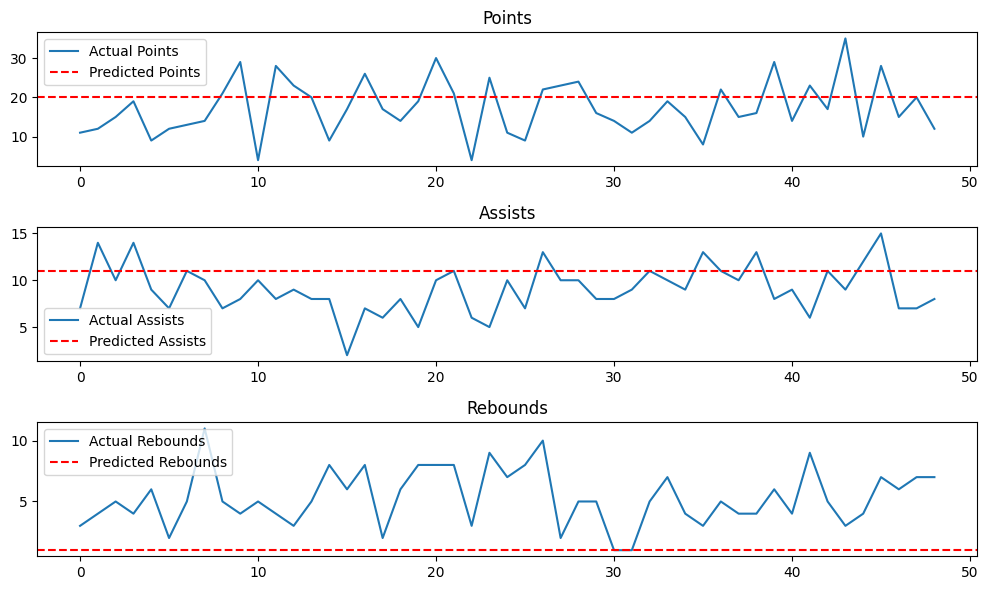

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22023,201935,0022301043,"MAR 25, 2024",LAC vs. IND,L,34,3,7,0.429,0,1,0.000,5,5,1.000,0,3,3,7,1,0,1,3,11,-24,1
1,22023,201935,0022301028,"MAR 24, 2024",LAC vs. PHI,L,34,5,13,0.385,0,6,0.000,2,2,1.000,1,3,4,14,1,1,2,0,12,-16,1
2,22023,201935,0022301017,"MAR 22, 2024",LAC @ POR,W,36,5,13,0.385,2,9,0.222,3,4,0.750,1,4,5,10,1,1,2,1,15,21,1
3,22023,201935,0022301003,"MAR 20, 2024",LAC @ POR,W,36,6,11,0.545,5,9,0.556,2,2,1.000,0,4,4,14,0,1,3,1,19,22,1
4,22023,201935,0022300982,"MAR 17, 2024",LAC vs. ATL,L,36,3,10,0.300,2,5,0.400,1,1,1.000,0,6,6,9,1,1,3,2,9,-15,1
5,22023,201935,0022300944,"MAR 12, 2024",LAC vs. MIN,L,34,4,10,0.400,2,6,0.333,2,2,1.000,0,2,2,7,2,0,4,1,12,-15,1
6,22023,201935,0022300924,"MAR 10, 2024",LAC vs. MIL,L,36,5,16,0.313,1,6,0.167,2,2,1.000,3,2,5,11,0,0,5,4,13,-13,1
7,22023,201935,0022300917,"MAR 09, 2024",LAC vs. CHI,W,34,4,10,0.400,4,10,0.400,2,2,1.000,0,11,11,10,1,0,1,2,14,4,1
8,22023,201935,0022300897,"MAR 06, 2024",LAC @ HOU,W,39,6,13,0.462,1,5,0.200,8,8,1.000,0,5,5,7,1,1,2,2,21,8,1
9,22023,201935,0022300880,"MAR 04, 2024",LAC @ MIL,L,37,9,16,0.563,5,10,0.500,6,9,0.667,0,4,4,8,0,1,3,2,29,-4,1


In [238]:
stats = playergamelog.PlayerGameLog(
    player_id=str(id),
    season="2023",
    season_type_all_star="Regular Season",
    date_from_nullable="12/6/2023"
)
stats = stats.get_data_frames()[0]

df = stats

# Feature Engineering
# Assuming you have preprocessed the data and selected relevant features

# Split data for training and testing
train_df = df.iloc[:-1]  # Exclude the last row for testing
test_df = df.iloc[-1:]   # Last row for testing

# Select features
features = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 
            'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS']

# Split into X (features) and y (target)
X_train = train_df[features]
y_pts_train = train_df['PTS']
y_ast_train = train_df['AST']
y_reb_train = train_df['REB']

X_test = test_df[features]

# Model Training
model_pts = LinearRegression()
model_ast = LinearRegression()
model_reb = LinearRegression()

model_pts.fit(X_train, y_pts_train)
model_ast.fit(X_train, y_ast_train)
model_reb.fit(X_train, y_reb_train)

# Model Evaluation (optional)
# Since you are predicting for a single game, evaluation might not be necessary

# Prediction
predicted_pts = model_pts.predict(X_test)
predicted_ast = model_ast.predict(X_test)
predicted_reb = model_reb.predict(X_test)

print("Predicted Points:", predicted_pts[0])
print("Predicted Assists:", predicted_ast[0])
print("Predicted Rebounds:", predicted_reb[0])

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(y_pts_train, label='Actual Points')
plt.axhline(y=predicted_pts[0], color='r', linestyle='--', label='Predicted Points')
plt.title('Points')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(y_ast_train, label='Actual Assists')
plt.axhline(y=predicted_ast[0], color='r', linestyle='--', label='Predicted Assists')
plt.title('Assists')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(y_reb_train, label='Actual Rebounds')
plt.axhline(y=predicted_reb[0], color='r', linestyle='--', label='Predicted Rebounds')
plt.title('Rebounds')
plt.legend()

plt.tight_layout()
plt.show()

df.head(10)